In [24]:
import jax
import jax.numpy as jnp
import matplotlib.pyplot as plt
import jaxopt
from sklearn.preprocessing import StandardScaler

from kernels import rbf, rat_quad, consine, linear, matern32, matern52, periodic, exp
from gp import build_gp
from loss import loss_func
from strategies import forward_search

## Dataset 1

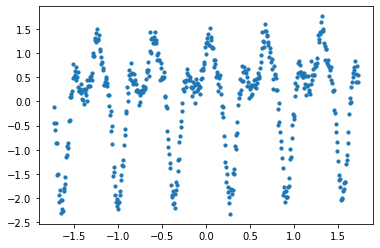

In [25]:
def get_experiment1():
    key = jax.random.PRNGKey(3)
    x = jnp.linspace(-3, 3, 500).reshape(-1,1)
    gt_kernel = linear(scale=1.0, sigma=1.0) + periodic(variance=0.1, scale=0.1, gamma=1.0)
    gt_mean = jnp.array(0.0)
    gt_noise = jnp.log(0.01)
    gp = build_gp((gt_kernel, gt_mean, gt_noise), x)
    y = gp.sample(key)
    
    x = StandardScaler().fit_transform(x).reshape(-1,1)
    y = StandardScaler().fit_transform(y.reshape(-1,1)).reshape(-1)
    return key, x, y, (gt_kernel, gt_mean, gt_noise)
    
key, x, y, params = get_experiment1()

plt.scatter(x, y, s=10);

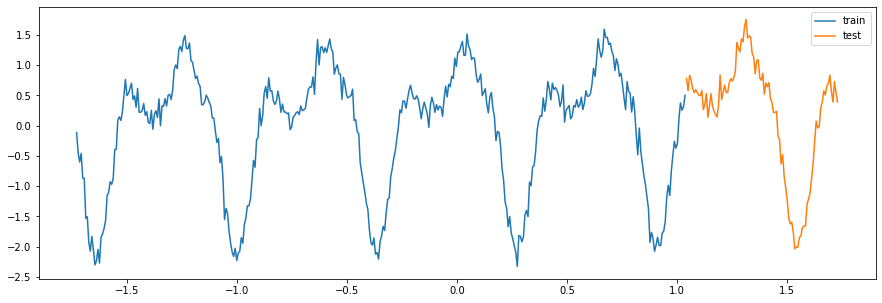

In [26]:
n_train = 400
x_train, x_test = x[:n_train], x[n_train:]
y_train, y_test = y[:n_train], y[n_train:]

plt.figure(figsize=(15, 5))
plt.plot(x_train, y_train, label="train")
plt.plot(x_test, y_test, label="test")
plt.legend();

In [ ]:
kernel_list = [rbf(), linear(), rat_quad()]
depth = 3

forward_search(x_train, y_train, x_test, y_test, kernel_list, n_restarts=5)

Experiment started at depth 0
Best kernel at depth 0 is ExpSquared
Experiment started at depth 1
Best kernel at depth 1 is (ExpSquared x Linear)
Experiment started at depth 2
